# Exploiting the power of data analysis to take business to the next level!

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.cloud import bigquery
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder

## Create the connection to BigQuery

In [6]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/rishikeshdhokare/Documents/Ironhack/instacart-441209-84de4dcbf601.json"
project_id = 'instacart-441209'
DATABASE_URI = f'bigquery://{project_id}'
engine = create_engine(DATABASE_URI)

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_17983/1851284379.py:4: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pybigquery.sqlalchemy_bigquery.BigQueryDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(DATABASE_URI)


In [26]:
query = """
SELECT
    op.order_id,
    op.product_id,
    op.add_to_cart_order,
    op.reordered,
    p.product_name,
    p.aisle_id,
    p.department_id,
    a.aisle,
    d.department,
    o.user_id,
    o.eval_set,
    o.order_number,
    o.order_dow,
    o.order_hour_of_day,
    o.days_since_prior_order
FROM
    `instacart-441209.instacart.order_products_train` AS op
JOIN
    `instacart-441209.instacart.products` AS p
    ON op.product_id = p.product_id
JOIN
    `instacart-441209.instacart.aisles` AS a
    ON p.aisle_id = a.aisle_id
JOIN
    `instacart-441209.instacart.departments` AS d
    ON p.department_id = d.department_id
JOIN
    `instacart-441209.instacart.orders` AS o
    ON op.order_id = o.order_id
LEFT JOIN
    `instacart-441209.instacart.order_products_prior` AS op_prior
    ON op_prior.order_id = op.order_id AND op_prior.product_id = op.product_id
"""
combined_df = pd.read_sql(query, engine)
categorical_columns = ['product_name', 'eval_set']
for col in categorical_columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])

combined_df = pd.get_dummies(combined_df, columns=['aisle', 'department', 'eval_set'], drop_first=True)
print(combined_df.head())

   order_id  product_id  add_to_cart_order  reordered  product_name  aisle_id  \
0   2798447       14877                 37          0         20208        20   
1   2798447       13064                 43          0         34736       127   
2   3236463       38957                  1          0         38525        34   
3   2309958       29255                  3          0          3329        64   
4   1271691       17482                  5          0          2166       133   

   department_id  user_id  order_number  order_dow  ...  department_household  \
0             11   184314            15          6  ...                 False   
1             11   184314            15          6  ...                 False   
2              1    58757             8          3  ...                 False   
3              7    77807            11          3  ...                 False   
4             11    69973            10          0  ...                 False   

   department_internationa

In [24]:
combined_df.shape

(1384617,)

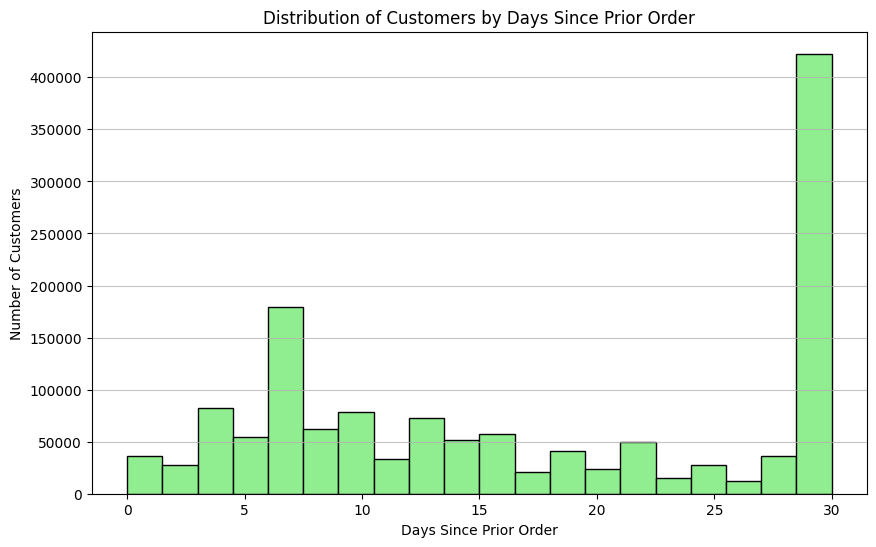

In [18]:
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/datafiles/orders.csv")
orders = orders['days_since_prior_order']

# Plot histogram for the distribution of 'days_since_prior_order'
plt.figure(figsize=(10, 6))
plt.hist(combined_df, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Customers by Days Since Prior Order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Customers")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()


In [137]:
orders = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/datafiles/orders.csv")
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [28]:
order_products_prior = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/order_products__prior.csv")
order_products_train = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/order_products__train.csv")

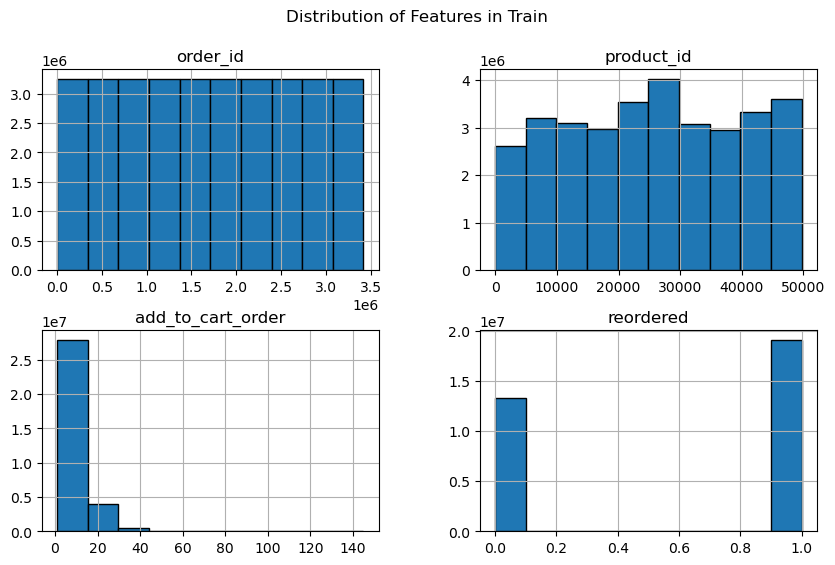

In [104]:
# Plotting histograms for each feature
order_products_prior.hist(bins=10, figsize=(10, 6), edgecolor='black')
plt.suptitle("Distribution of Features in Train")
plt.show()


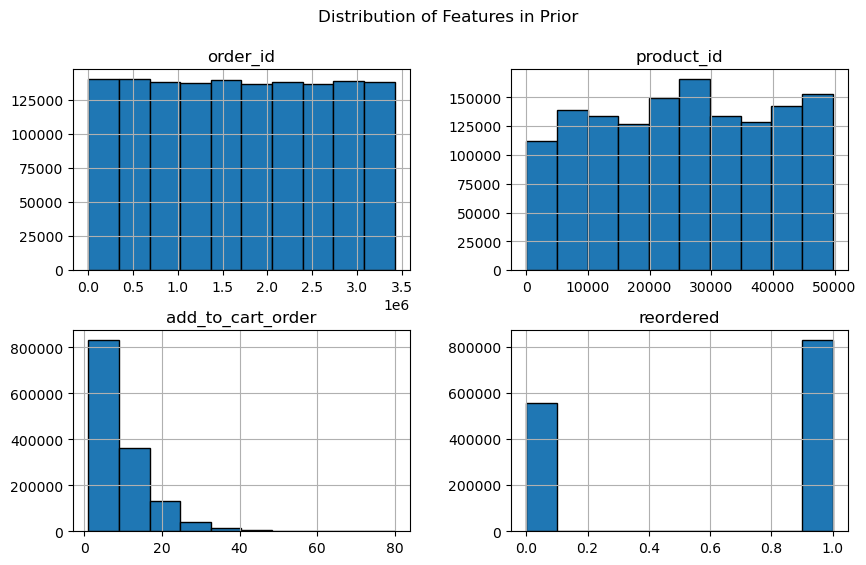

In [64]:
# Plotting histograms for each feature
order_products_train.hist(bins=10, figsize=(10, 6), edgecolor='black')
plt.suptitle("Distribution of Features in Train")
plt.show()


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13782/3362088738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='eval_set', data=orders, palette=colors)
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13782/3362088738.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='eval_set', data=orders, palette=colors)


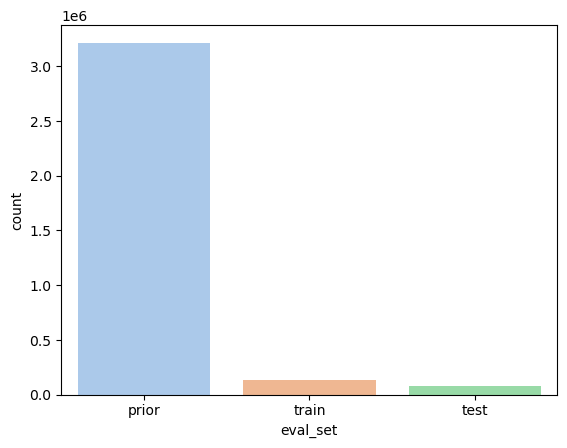

In [8]:
colors = sns.color_palette("pastel")
sns.countplot(x='eval_set', data=orders, palette=colors)
plt.show()

## Reordered Ratio of Products in Prior Set

reordered
1    0.589697
0    0.410303
Name: count, dtype: float64


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13782/4213713836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reorder_ratio_prior.index, y=reorder_ratio_prior.values, palette=colors)
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13782/4213713836.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['First-time ordered products', 'Reordered'])


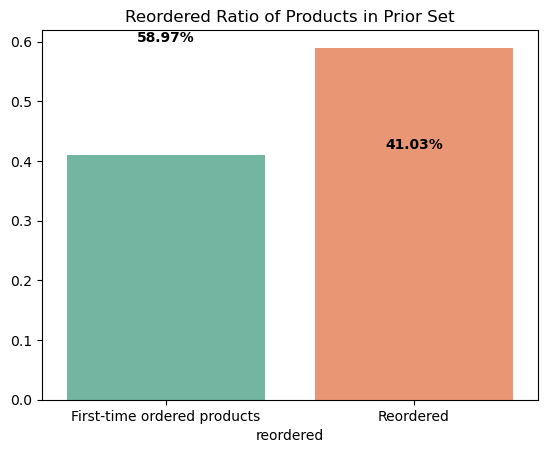

In [9]:
total_prod_count_prior = order_products_prior.shape[0]
reorder_ratio_prior = order_products_prior['reordered'].value_counts()/total_prod_count_prior
print(reorder_ratio_prior)

colors = ['#66c2a5', '#fc8d62']  # You can use any colors you like

# Plot the barplot
ax = sns.barplot(x=reorder_ratio_prior.index, y=reorder_ratio_prior.values, palette=colors)
ax.set_xticklabels(['First-time ordered products', 'Reordered'])

# Annotate each bar with the percentage
for i, value in enumerate(reorder_ratio_prior.values):
    ax.text(i, value + 0.01, f"{value:.2%}", ha='center', color='black', fontweight='bold')

# Set the plot title
plt.title('Reordered Ratio of Products in Prior Set')

# Show the plot
plt.show()


## Reordered Ratio of Products in Train Set

reordered
1    0.598594
0    0.401406
Name: count, dtype: float64


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13782/1235754156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reorder_ratio_train.index, y=reorder_ratio_train.values, palette=colors)
/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13782/1235754156.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['First-time ordered products', 'Reordered'])


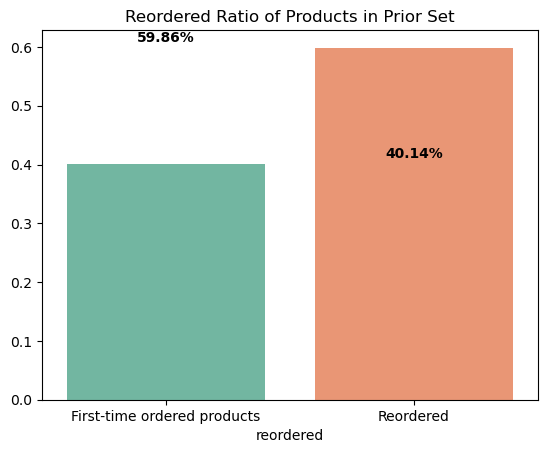

In [12]:
total_prod_count_train = order_products_train.shape[0]
reorder_ratio_train = order_products_train['reordered'].value_counts()/total_prod_count_train
print(reorder_ratio_train)

colors = ['#66c2a5', '#fc8d62']  # You can use any colors you like

# Plot the barplot
ax = sns.barplot(x=reorder_ratio_train.index, y=reorder_ratio_train.values, palette=colors)
ax.set_xticklabels(['First-time ordered products', 'Reordered'])

# Annotate each bar with the percentage
for i, value in enumerate(reorder_ratio_train.values):
    ax.text(i, value + 0.01, f"{value:.2%}", ha='center', color='black', fontweight='bold')

# Set the plot title
plt.title('Reordered Ratio of Products in Prior Set')

# Show the plot
plt.show()


# Data Preparation

In [14]:
order_products = pd.concat([order_products_prior, order_products_train], ignore_index=True)
print(order_products.shape)

(33819106, 4)


In [16]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

In [26]:
order_products = order_products.to_csv('/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/order_products.csv', index=False)

In [8]:
order_products = pd.read_csv("/Users/rishikeshdhokare/Documents/Ironhack/FinalProject/instacart-customer-churn-analysis/datafiles/order_products.csv")
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [58]:
train_df = order_products[order_products['eval_set'] == 'train']['user_id'].unique()

# Display the user IDs
print("User IDs with eval_set as 'train':", train_df)

User IDs with eval_set as 'train': [112108  79431  42756 ... 136952 169679 139822]


In [12]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [67]:
order_products['reordered'].unique()

array([1, 0])

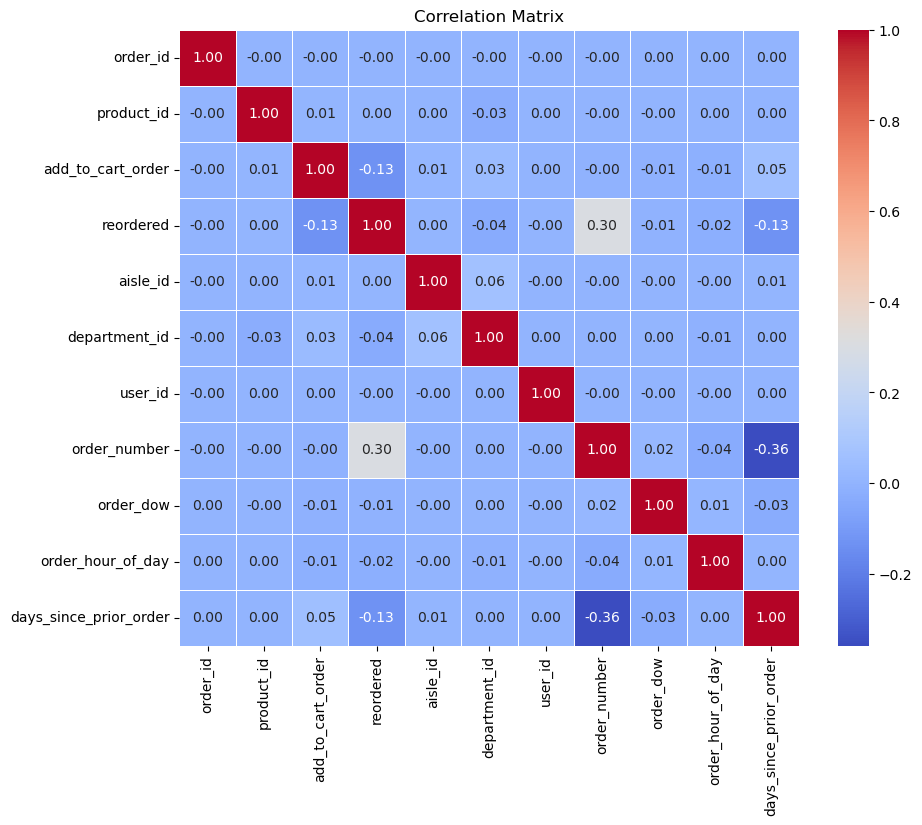

In [38]:
numeric_data = order_products.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)

    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [45]:
reordered_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
reordered_df = reordered_df.sort_values('total', ascending=False).reset_index()
reordered_df

,aisle,total,reorders
0,fresh fruits,3792661,2726251
1,fresh vegetables,3568630,2123540
2,packaged vegetables fruits,1843806,1178700
3,yogurt,1507583,1034957
4,packaged cheese,1021462,598280
...,...,...,...
129,eye ear care,9522,2100
130,baby bath body care,8909,2626
131,baby accessories,8466,4669
132,beauty,6455,1374


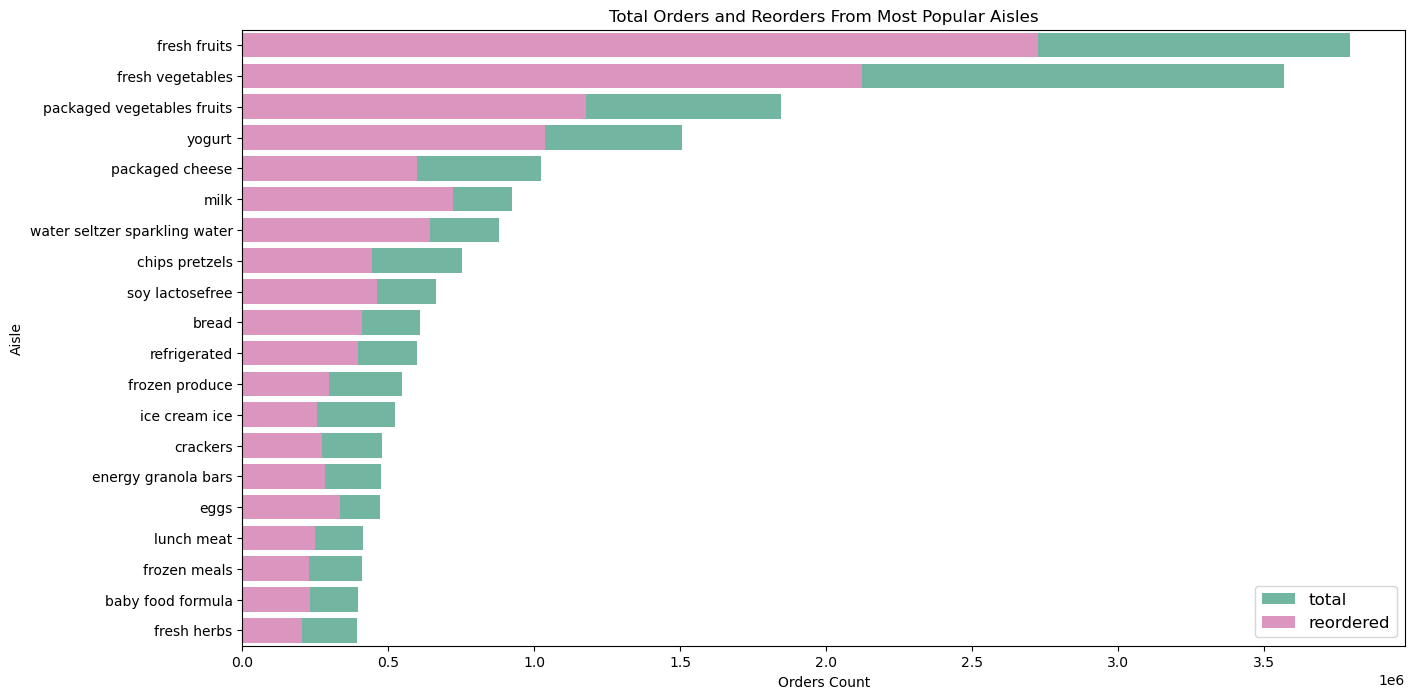

In [47]:
color = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(y=temp_df.aisle[0:20], x=reordered_df.total[0:20], color=color[0], label="total", ax=ax)
sns.barplot(y=temp_df.aisle[0:20], x=reordered_df.reorders[0:20], color=color[3], label="reordered", ax=ax)

ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc=4, prop={'size': 12})

plt.show()


In [49]:
reordered_df["reorder_ratio"] = reordered_df.reorders/reordered_df.total
reordered_df = reordered_df.sort_values("reorder_ratio", ascending=False).reset_index()
reordered_df

,index,aisle,total,reorders,reorder_ratio
0,5,milk,923659,722128,0.781812
1,6,water seltzer sparkling water,878150,640988,0.729930
2,0,fresh fruits,3792661,2726251,0.718823
3,15,eggs,472009,333408,0.706359
4,8,soy lactosefree,664493,460069,0.692361
...,...,...,...,...,...
129,132,beauty,6455,1374,0.212858
130,125,first aid,11411,2235,0.195864
131,128,kitchen supplies,9620,1874,0.194802
132,108,baking supplies decor,24786,4154,0.167595


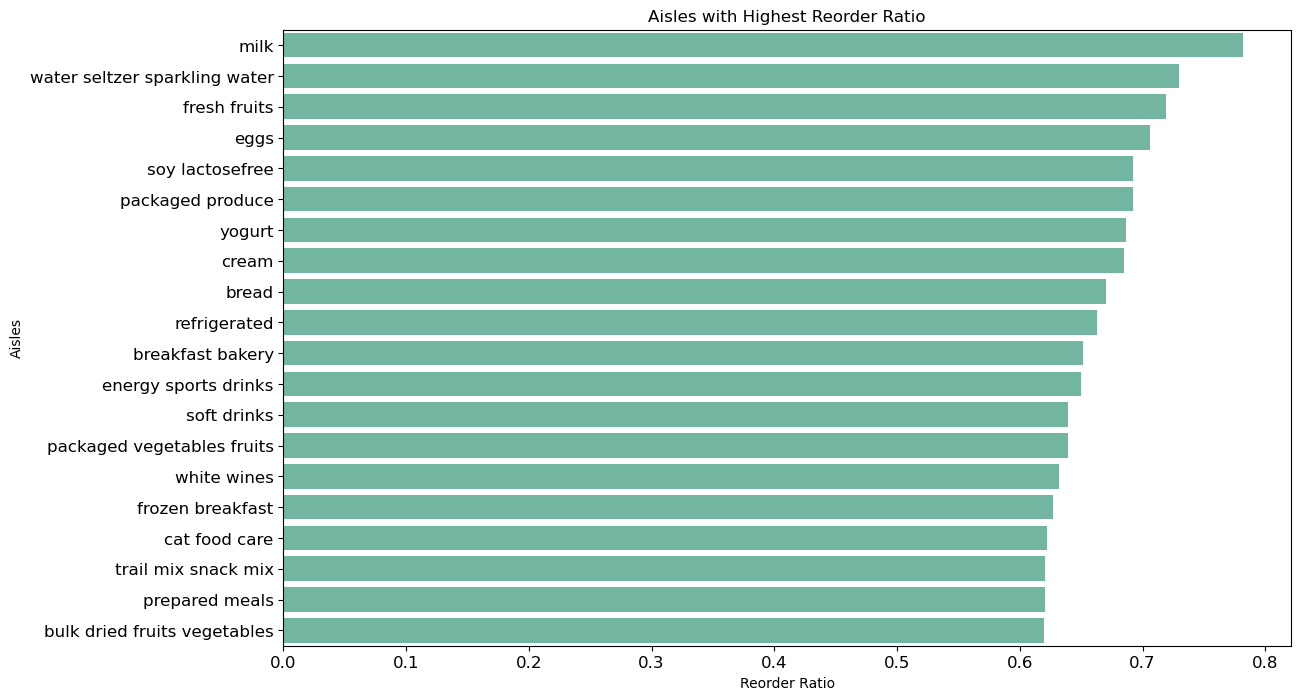

In [51]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = reordered_df.aisle[0:20], x = reordered_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [53]:
deparments_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
deparments_df = deparments_df.sort_values('total', ascending=False).reset_index()
deparments_df

,department,total,reorders
0,produce,9888378,6432596
1,dairy eggs,5631067,3773723
2,snacks,3006412,1727075
3,beverages,2804175,1832952
4,frozen,2336858,1268058
5,pantry,1956819,679799
6,bakery,1225181,769880
7,canned goods,1114857,511317
8,deli,1095540,666231
9,dry goods pasta,905340,418466


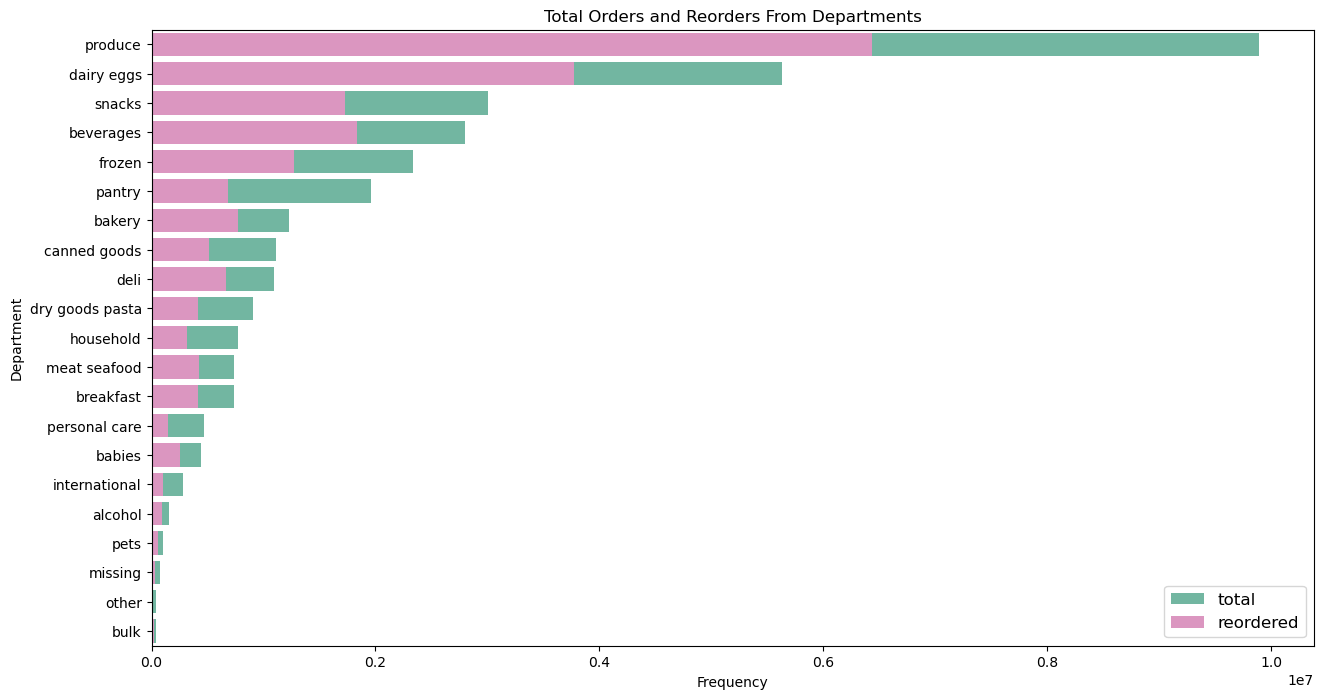

In [55]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = deparments_df.department, x = deparments_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = deparments_df.department, x = deparments_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [59]:
deparments_df["reorder_ratio"] = deparments_df.reorders/temp_df.total
deparments_df = deparments_df.sort_values("reorder_ratio", ascending=False).reset_index()
deparments_df

,level_0,index,department,total,reorders,reorder_ratio
0,3,1,dairy eggs,5631067,3773723,2.503161
1,5,2,snacks,3006412,1727075,1.869819
2,0,0,produce,9888378,6432596,1.696064
3,9,5,pantry,1956819,679799,1.117229
4,2,3,beverages,2804175,1832952,0.994113
5,11,7,canned goods,1114857,511317,0.938012
6,6,6,bakery,1225181,769880,0.876707
7,10,9,dry goods pasta,905340,418466,0.698481
8,13,10,household,774652,312447,0.653067
9,4,8,deli,1095540,666231,0.652233
